# Decision Tree - 분류

## 실습용 데이터 설정
* iris.csv

In [1]:
!ls

iris.csv  sample_data


* pandas DataFrame

In [2]:
import pandas as pd

DF = pd.read_csv('iris.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
DF.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# I. 탐색적 데이터 분석

> ## 1) 빈도분석

In [4]:
DF.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

> ## 2) 분포 시각화

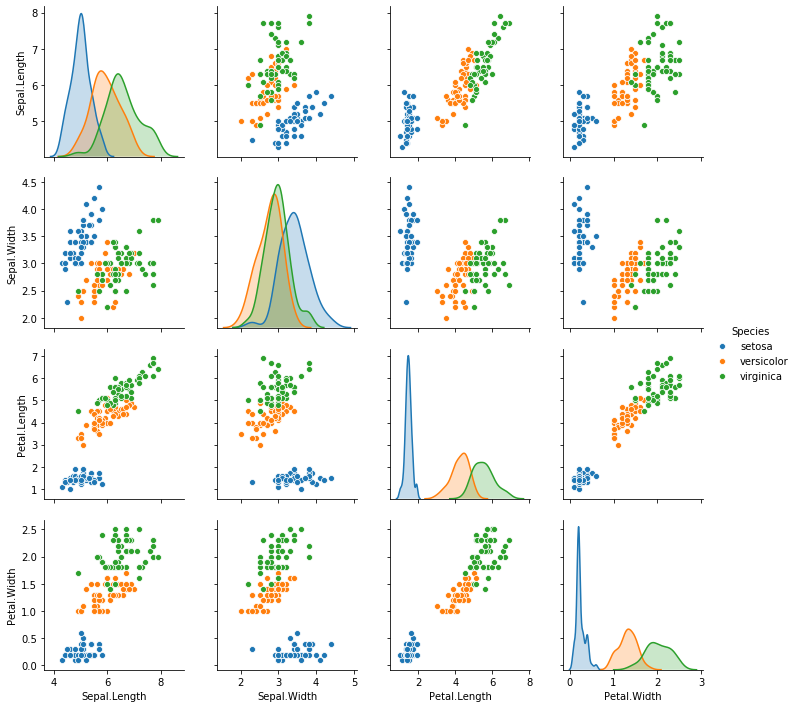

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue = 'Species', data = DF)
plt.show()

# II. Data Preprocessing

> ## 1) Standardization

In [0]:
from sklearn.preprocessing import StandardScaler

X = DF[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = DF['Species']

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

> ## 2) Train & Test Split

* 7: 3

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape)
print('Test Data : ', X_test.shape)

Train Data :  (105, 4)
Test Data :  (45, 4)


# III. Modeling

> ## 1) Train_Data로 모델 생성

In [15]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier()
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

> ## 2) Visualization

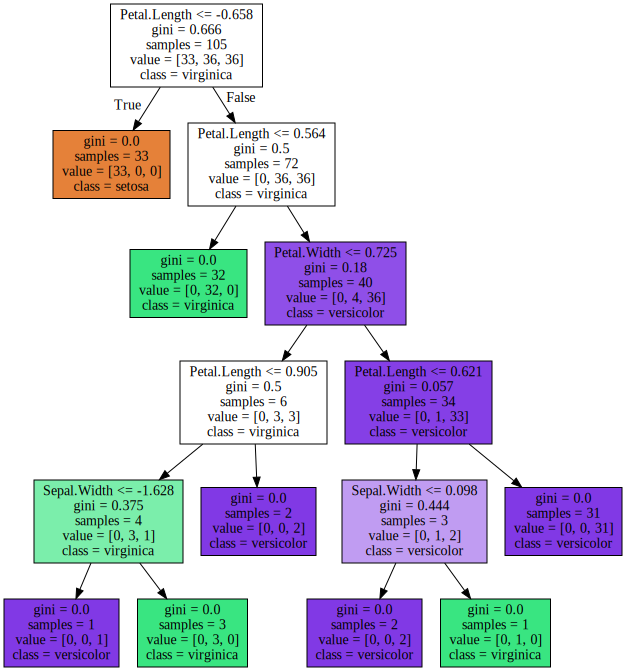

In [16]:
from sklearn.tree import export_graphviz
import graphviz
# 가장 보기 편하다.

graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['setosa', 'virginica', 'versicolor']),
                                feature_names = (['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']),
                                filled = True))

> ## 3) Test_Data에 Model 적용

In [0]:
y_hat = Model_dt.predict(X_test)

> ## 4) Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 12]])

> ## 5) Accuracy, Precision, Recall

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, average = None))
print(recall_score(y_test, y_hat, average = None))

0.9555555555555556
[1.    0.875 1.   ]
[1.         1.         0.85714286]


> ## 6) F1_Score - 'No'

In [20]:
from sklearn.metrics import f1_score
# 전반적으로 다 높다.

f1_score(y_test, y_hat, average = None)

array([1.        , 0.93333333, 0.92307692])

# IV. Pruning(가지치기)

* min_samples_split : 분할을 위한 최소한의 샘플데이터 개수
* min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플데이터 개수
* max_leaf_nodes : 말단 노드의 최대 개수
* max_depth : 트리모델의 최대 깊이를 지정

> ## 1) Model Pruning

In [24]:
from sklearn.tree import DecisionTreeClassifier

Model_pr = DecisionTreeClassifier(max_depth = 3)
Model_pr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

> ## 2) Model Visualization

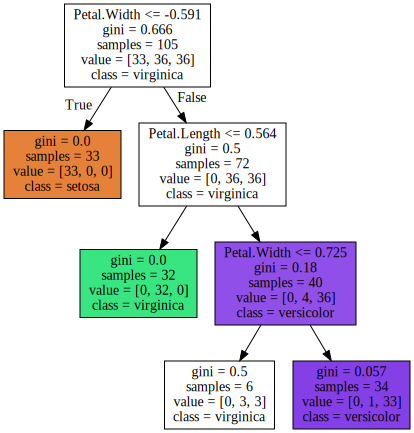

In [25]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_pr,
                                class_names = (['setosa', 'virginica', 'versicolor']),
                                feature_names = (['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']),
                                filled = True))

> ## 3) Model Evaluate

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_hat = Model_pr.predict(X_test)

print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, average = None))
print(recall_score(y_test, y_hat, average = None))

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]
0.9555555555555556
[1.    0.875 1.   ]
[1.         1.         0.85714286]


# V. Feature Importance

> ## 1) Feature Importance 값 확인

In [27]:
Model_pr.feature_importances_

array([0.        , 0.        , 0.44306547, 0.55693453])

> ## 2) Feature Importance 시각화

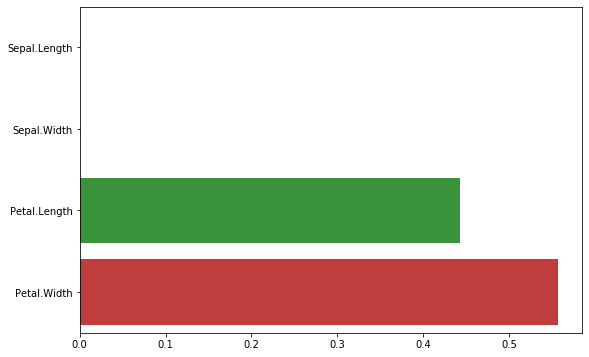

In [28]:
plt.figure(figsize = (9, 6))
sns.barplot(Model_pr.feature_importances_,
            ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])
plt.show()

# 
# 
# 
# The End
# 
# 
# 